<img src="../images/Peoplelogy-Logo.png" style="height: 100px;" align=left> 
<img src="../images/sklearn-logo.png" style="height: 100px;" align=right>

# Project: Predicting Boston Housing Prices

---

<img src="../images/forsale.avif">

---

### Description
This dataset is sourced from the **UCI Machine Learning Repository** and concerns housing values in the suburbs of Boston.

---

### Content
- **Number of Instances**: 506

---

### Attribute Information

| **Feature**  | **Description**                                                                                 |
|--------------|-------------------------------------------------------------------------------------------------|
| `CRIM`       | Per capita crime rate by town.                                                                  |
| `ZN`         | Proportion of residential land zoned for lots over 25,000 sq.ft.                                |
| `INDUS`      | Proportion of non-retail business acres per town.                                               |
| `CHAS`       | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).                          |
| `NOX`        | Nitric oxides concentration (parts per 10 million).                                             |
| `RM`         | Average number of rooms per dwelling.                                                          |
| `AGE`        | Proportion of owner-occupied units built prior to 1940.                                         |
| `DIS`        | Weighted distances to five Boston employment centres.                                           |
| `RAD`        | Index of accessibility to radial highways.                                                     |
| `TAX`        | Full-value property-tax rate per 10,000.                                                       |
| `PTRATIO`    | Pupil-teacher ratio by town.                                                                    |
| `B`          | \( 1000(Bk - 0.63)^2 \), where \( Bk \) is the proportion of blacks by town.                    |
| `LSTAT`      | Percentage of the population with lower socioeconomic status.                                   |
| `MEDV`       | Median value of owner-occupied homes in $1000's (Target variable).                              |

---

### Usage
This dataset is often used for:
1. Regression problems to predict `MEDV` (housing price).
2. Exploratory data analysis and feature engineering practice.

## Instructions
You will build a linear regression model to predict housing prices using the Boston Housing Prices dataset. Complete each task step-by-step as outlined below.

---

## Expected Learning Outcomes
- Normalize data using `StandardScaler`.
- Perform a train-test split.
- Build a machine learning pipeline.
- Evaluate a regression model using MSE and \( R^2 \).


### Step 1: Load and Explore the Dataset
1. **Load the Boston Housing Prices dataset using `../data/housing.csv`.** 
   - Display the first 5 rows of the dataset as a pandas DataFrame.
   - Assign the features to \( X \) and the target variable (`MEDV`) to \( y \).
   
   **Hint**:
   - Use `pd.DataFrame` to convert the dataset into a DataFrame.
   - The target variable can be accessed via `df.MEDV`.

---


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.datasets
import ssl
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sns.set()

In [6]:
# Your code here
df = pd.read_csv("../data/housing.csv",)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df[['MEDV']].shape

(506, 1)

In [8]:
# Load the Boston Housing dataset
df = pd.read_csv("../data/housing.csv")

# Display the first 5 rows of the dataset
print(df.head(5))

# Assign features (X) and target variable (y)
X = df.drop(columns=["MEDV"]) 
y = df["MEDV"]  

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [9]:
print(df["MEDV"])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64



### Step 2: Normalize the Features
2. **Use `StandardScaler` to normalize the features in \( X \).** 
   - Apply normalization **only after splitting** the data into training and testing sets.
   
   **Hint**:
   - First, perform train-test split using `train_test_split`.
   - Fit the scaler on the training data only and transform both training and testing data.

---


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [11]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84
264,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,5,264,13.0,387.89,8.10
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03
205,0.13642,0.0,10.59,0,0.489,5.891,22.3,3.9454,4,277,18.6,396.90,10.87
79,0.08387,0.0,12.83,0,0.437,5.874,36.6,4.5026,5,398,18.7,396.06,9.10


In [12]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (379, 13)
y_train.shape (379,)
X_test.shape (127, 13)
y_test.shape (127,)


In [13]:
model= LinearRegression().fit(X_train, y_train)
print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))

Intercept: 23.95674601756599
Slope:     [-1.29372986e-01  2.95904870e-02  2.22928425e-02  2.83744579e+00
 -1.53954203e+01  5.27557273e+00 -1.05383841e-02 -1.30170765e+00
  2.66392896e-01 -1.09686702e-02 -9.64830193e-01  1.08603361e-02
 -3.78363465e-01]



### Step 3: Split the Data
3. **Split the dataset into training and testing sets with an 80-20 split.**
- Assign the result to variables 
  $ X_{\text{train}}, X_{\text{test}}, y_{\text{train}}, y_{\text{test}} $.

  **Hint**:
  - Use `train_test_split` from `sklearn.model_selection`.

---


In [14]:
# Your Code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=101)
model = LinearRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train R2 Score: {}".format(r2_train))
print("Test R2 Score:  {}".format(r2_test))
###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model = LinearRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train R2 Score: {}".format(r2_train))
print("Test R2 Score:  {}".format(r2_test))

Train R2 Score: 0.7358659669870724
Test R2 Score:  0.678034990023523
Train R2 Score: 0.7513747062933072
Test R2 Score:  0.7034623076515885



### Step 4: Create a Pipeline
4. **Build a pipeline that includes:**
   - `StandardScaler` for normalization.
   - `LinearRegression` for fitting the model.
   - Fit the pipeline to the training data.
   
   **Hint**:
   - Use `Pipeline` from `sklearn.pipeline`.

---


In [15]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),      
    ('regressor', LinearRegression())  
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)



### Step 5: Evaluate the Model
5. **Use the pipeline to make predictions on the test data.**
   - Evaluate the model using:
     - Mean Squared Error (MSE).
     - R-squared (\( R^2 \)).
   
   **Hint**:
   - Use `mean_squared_error` and `r2_score` from `sklearn.metrics`.

---



In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 21.517444231177205


In [17]:
r2 = r2_score(y_test, y_pred) 
print("R-squared :        {}".format(r2))

R-squared :        0.7112260057484934


### Step 6: Visualize the Results (Optional)
6. **Create a scatter plot comparing the predicted prices vs actual prices for the test data.**
   
   **Hint**:
   - Use `plt.scatter` from `matplotlib.pyplot`.

---


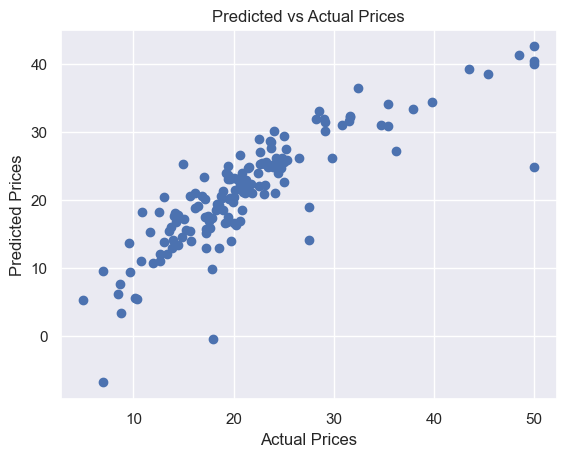

In [18]:
# Scatter plot for predicted vs actual prices

plt.scatter(y_test, y_pred, label='Predicted vs Actual')

plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
